# 基于词向量的英汉翻译——“火炬上的深度学习"下第一次作业

在这个作业中，你需要半独立地完成一个英文到中文的单词翻译器

本文件是集智AI学园http://campus.swarma.org 出品的“火炬上的深度学习”第VI课的配套源代码

In [1]:
# 加载必要的程序包
# PyTorch的程序包
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# 数值运算和绘图的程序包
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


# 加载机器学习的软件包，主要为了词向量的二维可视化
from sklearn.decomposition import PCA

#加载Word2Vec的软件包
import gensim as gensim
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
from gensim.models.word2vec import LineSentence

#加载正则表达式处理的包
import re

#在Notebook界面能够直接显示图形
%matplotlib inline

C:\ProgramData\Anaconda3\envs\tf36\lib\site-packages\gensim\utils.py:862: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## 第一步：加载词向量

首先，让我们加载别人已经在大型语料库上训练好的词向量

In [2]:
# 加载中文词向量，下载地址为：链接：http://pan.baidu.com/s/1gePQAun 密码：kvtg
# 该中文词向量库是由尹相志提供，训练语料来源为：微博、人民日报、上海热线、汽车之家等，包含1366130个词向量
word_vectors = KeyedVectors.load_word2vec_format('vectors.bin', binary=True, unicode_errors='ignore')
len(word_vectors.vocab)

1366130

In [7]:
# 加载中文的词向量，下载地址为：http://nlp.stanford.edu/data/glove.6B.zip，解压后将glove.6B.100d.txt文件拷贝到与本notebook
# 文件一致的文件夹洗面。
f = open('glove.6B.100d.txt', 'r', encoding = 'utf-8')
i = 1

# 将英文的词向量都存入如下的字典中
word_vectors_en = {}
#with open('glove.6B.100d.txt') as f:
for line in f:
    numbers = line.split()
    word = numbers[0]
    vectors = np.array([float(i) for i in numbers[1 : ]])
    word_vectors_en[word] = vectors
    i += 1
print(len(word_vectors_en))
print(i)

400000
400001


In [8]:
print(word_vectors_en['the'])

[-0.038194 -0.24487   0.72812  -0.39961   0.083172  0.043953 -0.39141
  0.3344   -0.57545   0.087459  0.28787  -0.06731   0.30906  -0.26384
 -0.13231  -0.20757   0.33395  -0.33848  -0.31743  -0.48336   0.1464
 -0.37304   0.34577   0.052041  0.44946  -0.46971   0.02628  -0.54155
 -0.15518  -0.14107  -0.039722  0.28277   0.14393   0.23464  -0.31021
  0.086173  0.20397   0.52624   0.17164  -0.082378 -0.71787  -0.41531
  0.20335  -0.12763   0.41367   0.55187   0.57908  -0.33477  -0.36559
 -0.54857  -0.062892  0.26584   0.30205   0.99775  -0.80481  -3.0243
  0.01254  -0.36942   2.2167    0.72201  -0.24978   0.92136   0.034514
  0.46745   1.1079   -0.19358  -0.074575  0.23353  -0.052062 -0.22044
  0.057162 -0.15806  -0.30798  -0.41625   0.37972   0.15006  -0.53212
 -0.2055   -1.2526    0.071624  0.70565   0.49744  -0.42063   0.26148
 -1.538    -0.30223  -0.073438 -0.28312   0.37104  -0.25217   0.016215
 -0.017099 -0.38984   0.87424  -0.72569  -0.51058  -0.52028  -0.1459
  0.8278    0.27062 ]

## 第二步：可视化同一组意思词在两种不同语言的词向量中的相互位置关系

In [12]:
# 中文的一二三四五列表
cn_list = {'一', '二', '三', '四', '五', '六', '七', '八', '九', '零'}
# 阿拉伯数字的12345列表
en_list = {'1', '2', '3', '4', '5', '6', '7', '8', '9', '0'}
# 英文数字的列表
#en_list = {'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'zero'}

# 对应词向量都存入到列表中
cn_vectors = []  #中文的词向量列表
en_vectors = []  #英文的词向量列表
for w in cn_list:
    cn_vectors.append(word_vectors[w])
for w in en_list:
    en_vectors.append(word_vectors_en[w])

# 将这些词向量统一转化为矩阵
cn_vectors = np.array(cn_vectors)
en_vectors = np.array(en_vectors)

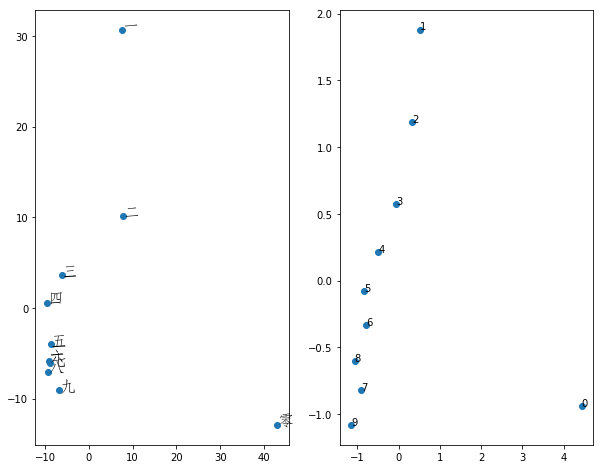

In [32]:
# 降维实现可视化
X_reduced = PCA(n_components = 2).fit_transform(cn_vectors)
Y_reduced = PCA(n_components = 2).fit_transform(en_vectors)

# 绘制所有单词向量的二维空间投影
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 8))
ax1.plot(X_reduced[:, 0], X_reduced[:, 1], 'o')
ax2.plot(Y_reduced[:, 0], Y_reduced[:, 1], 'o')
zhfont1 = matplotlib.font_manager.FontProperties(fname='C:\Windows\Fonts\STFANGSO.TTF', size=16)
for i, w in enumerate(cn_list):
    ax1.text(X_reduced[i, 0], X_reduced[i, 1], w, fontproperties = zhfont1, alpha = 1)
for i, w in enumerate(en_list):
    ax2.text(Y_reduced[i, 0], Y_reduced[i, 1], w, alpha = 1)

### 结论：可以看出，中文的一、二、等数字彼此之间的关系与英文的数字彼此之间的关系很类似

## 第三步：训练一个神经网络，输入一个英文单词的词向量，输出一个中文的词向量，并翻译为中文

首先，读入一个已经建立好的词典（dictionary.txt）。本词典是老师调用百度翻译的API，自动将一篇英文小说中的词汇逐个翻译为中文而得来的

我们一个个地载入词典，并查找对应的中文词向量，如果找得到，则放入original_words中，做为正式的训练集

In [40]:
original_words = []
with open('dictionary.txt', 'r', encoding = 'utf-8') as f:
    dataset = []
    for line in f:
        itm = line.split('\t')
        eng = itm[0]
        chn = itm[1].strip()
        if eng in word_vectors_en and chn in word_vectors:
            data = word_vectors_en[eng]
            target = word_vectors[chn]
            # 将中英文词对做成数据集
            dataset.append([data, target])
            original_words.append([eng, chn])
print(len(dataset)) # 共有4962个单词做为总的数据集合
#print(dataset[0])

4962


In [57]:
# 建立训练集、测试集和校验集
# 训练集用来训练神经网络，更改网络的参数；校验集用来判断网络模型是否过拟合：当校验集的损失数值超过训练集的时候，即为过拟合
# 测试集用来检验模型的好坏
indx = np.random.permutation(range(len(dataset)))
dataset = [dataset[i] for i in indx]
original_words = [original_words[i] for i in indx]
train_size = 500
train_data = dataset[train_size:]
valid_data = dataset[train_size // 2 : train_size]
test_data = dataset[: train_size // 2]
test_words = original_words[: train_size // 2]
print(train_size // 2)

250


In [58]:
# 开始训练一个多层神经网络，将一个100维度的英文向量映射为200维度的中文词向量，隐含层节点为30

input_size = 100
output_size = 200
hidden_size = 30

# 新建一个神经网络，包含一个隐含层
model = nn.Sequential(nn.Linear(input_size, hidden_size),
                     nn.Tanh(),
                     nn.Linear(hidden_size, output_size)
                     )

# 构造损失函数
criterion = torch.nn.MSELoss()

# 构造优化器
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

# 总的循环周期
num_epoch = 100


#开始训练500次，每次对所有的数据都做循环
results = []
for epoch in range(num_epoch):
    train_loss = []
    for data in train_data:
        # 读入数据
        x = Variable(torch.FloatTensor(data[0])).unsqueeze(0)
        y = Variable(torch.FloatTensor(data[1])).unsqueeze(0)
        # 模型预测
        output = model(x)
        
        # 反向传播算法训练
        optimizer.zero_grad()
        loss = criterion(output, y)
        train_loss.append(loss.data.numpy()[0])
        loss.backward()
        optimizer.step()
    # 在校验集上测试一下效果
    valid_loss = []
    for data in valid_data:
        x = Variable(torch.FloatTensor(data[0])).unsqueeze(0)
        y = Variable(torch.FloatTensor(data[1])).unsqueeze(0)
        output = model(x)
        loss = criterion(output, y)
        valid_loss.append(loss.data.numpy()[0])
    results.append([np.mean(train_loss), np.mean(valid_loss)])
    print('{}轮，训练Loss: {:.2f}, 校验Loss: {:.2f}'.format(epoch, np.mean(train_loss), np.mean(valid_loss)))


0轮，训练Loss: 8.73, 校验Loss: 8.68
1轮，训练Loss: 8.31, 校验Loss: 8.36
2轮，训练Loss: 8.06, 校验Loss: 8.18
3轮，训练Loss: 7.91, 校验Loss: 8.07
4轮，训练Loss: 7.81, 校验Loss: 7.99
5轮，训练Loss: 7.72, 校验Loss: 7.92
6轮，训练Loss: 7.65, 校验Loss: 7.87
7轮，训练Loss: 7.59, 校验Loss: 7.82
8轮，训练Loss: 7.54, 校验Loss: 7.79
9轮，训练Loss: 7.49, 校验Loss: 7.75
10轮，训练Loss: 7.45, 校验Loss: 7.72
11轮，训练Loss: 7.42, 校验Loss: 7.69
12轮，训练Loss: 7.39, 校验Loss: 7.67
13轮，训练Loss: 7.36, 校验Loss: 7.65
14轮，训练Loss: 7.33, 校验Loss: 7.63
15轮，训练Loss: 7.31, 校验Loss: 7.61
16轮，训练Loss: 7.29, 校验Loss: 7.59
17轮，训练Loss: 7.27, 校验Loss: 7.58
18轮，训练Loss: 7.25, 校验Loss: 7.57
19轮，训练Loss: 7.23, 校验Loss: 7.55
20轮，训练Loss: 7.22, 校验Loss: 7.54
21轮，训练Loss: 7.20, 校验Loss: 7.53
22轮，训练Loss: 7.19, 校验Loss: 7.52
23轮，训练Loss: 7.18, 校验Loss: 7.52
24轮，训练Loss: 7.17, 校验Loss: 7.51
25轮，训练Loss: 7.16, 校验Loss: 7.50
26轮，训练Loss: 7.15, 校验Loss: 7.49
27轮，训练Loss: 7.14, 校验Loss: 7.49
28轮，训练Loss: 7.13, 校验Loss: 7.48
29轮，训练Loss: 7.12, 校验Loss: 7.48
30轮，训练Loss: 7.11, 校验Loss: 7.47
31轮，训练Loss: 7.11, 校验Loss: 7.47
32轮，训练Loss: 7.10, 

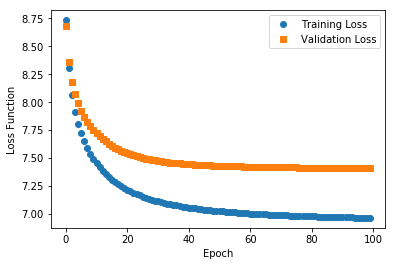

In [59]:
# 绘制图形
a = [i[0] for i in results]
b = [i[1] for i in results]
plt.plot(a, 'o', label = 'Training Loss')
plt.plot(b, 's', label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Function')
plt.legend()

In [61]:
# 在测试集上验证准确度
# 检验标准有两个：一个是直接用预测的词和标准答案做全词匹配；另一个是做单字的匹配
exact_same = 0  #全词匹配数量
one_same = 0 #单字匹配数量
results = []
for i, data in enumerate(test_data):
    x = Variable(torch.FloatTensor(data[0])).unsqueeze(0)
    # 给出模型的输出
    output = model(x)
    output = output.squeeze().data.numpy()
    # 从中文词向量中找到与输出向量最相似的向量
    most_similar = word_vectors.wv.similar_by_vector(output, 1)
    # 将标准答案中的词与最相似的向量所对应的词打印出来
    results.append([original_words[i][1], most_similar[0][0]])
    
    # 全词匹配
    if original_words[i][1] == most_similar[0][0]:
        exact_same += 1
    # 某一个字匹配
    if list(set(list(original_words[i][1])) & set(list(most_similar[0][0]))) != []:
        one_same += 1
    
print("精确匹配率：{:.2f}".format(1.0 * exact_same / len(test_data)))
print('一字匹配率：{:.2f}'.format(1.0 * one_same / len(test_data)))
print(results)

精确匹配率：0.08
一字匹配率：0.17
[['罐', '履带'], ['图像', '图像'], ['先生', '彼得'], ['狄龙', '杰克'], ['未知', '死去'], ['肉', '屑'], ['呆', '休息'], ['顶', '白色'], ['卡盘', '杰克'], ['尤利乌斯', '彼得'], ['驼背', '鲸鱼'], ['什么', '体育运动'], ['钉', '夹子'], ['幸运', '我'], ['嘲弄', '大笑'], ['密西西比', '谷地'], ['结巴', '站起'], ['闪耀', '光亮'], ['进行', '停下来'], ['商务', '布偶'], ['雷鸣', '响起'], ['动画', '音乐'], ['耸立', '悬空'], ['吃', '吃'], ['作物', '繁殖'], ['躺', '水沟'], ['真理', '真理'], ['简单', '简单'], ['异常', '明显'], ['危害', '威胁'], ['山姆', '哥哥'], ['尖叫', '大叫'], ['支持', '和'], ['发生', '因为'], ['带', '舞'], ['走', '看见'], ['修剪', '蹲'], ['警告', '警告'], ['天', '晚上'], ['迎来', '重现'], ['主机', '招待'], ['出生', '患病'], ['小', '小孔'], ['示意', '迟疑'], ['结算', '清理'], ['丑', '暴君'], ['可能', '可能'], ['加班', '分'], ['数', '平均'], ['怀疑', '不解'], ['命运', '毁灭'], ['禁止', '强迫'], ['缝', '脖子'], ['拉斯维加斯', '海滩'], ['青少年', '女孩'], ['山墙', '尖顶'], ['旁路', '复位'], ['护腿', '裙子'], ['企业', '企业'], ['精神', '食物'], ['周日', '工作日'], ['斜眼', '看到'], ['痛苦', '脆弱'], ['大吃一惊', '淡定'], ['完善', '它'], ['偏执', '恐惧'], ['兔', '蜥蜴'], ['打扰', '我'], ['扣除', '费用'], ['节奏', '颤动'], ['鲸鱼', 